# REGIONAL REGRASJONSANALYSE AV TOTALT TILSIG/MAGASINVOLUM
## Tipper/predikerer foregående ukes verdi
Dette scriptet utfører en estimering det totale tilsiget (ukjent+kjent) i hver av regionene: NO1-NO5 og SE1-SE4. Tippingen på tilsig og/eller magasin er basert på regresjon fra en mengde kjente serier for bla. tilsig og magasinvolum. Tippingen skrives til seriene regest% (søk i tidsserier). 

Beskrivelse av metoden:
1. Leser inn kjente serier for tilsig og/eller magasinvolum fra SMG, og henter ukesverdiene. Dette gjøres i egen celle slik at man kan kun trenger å lese inn en gang siden dette tar noen minutter.
2. Leser inn fasiten, og regner så ut korrelasjonen (R2) mellom faiten og inputseriene. Et antall serier som skal tas med videre velges så utifra "ant_kandidater" med høyeste korrelasjon med fasiten.
3. Kjøre regresjon så langt tilbake som vi har data (2015.06.08), og luker ut den høyeste p-verdien. Dette kjøres om og om igjen helt til den høyeste p-verdien er laveren enn "max_p".
4. Til slutt kjøres en regresjon på en kortere periode (reg_period) med utvalget av serier som har blitt gjort i steg 2 og 3. Resultatet fra denne regresjonen blir modellen som brukes til å estimere/tippe neste ukes verdi.
5. Scriptet gjør 10 slike tippinger, 10 uker tilbake i tid, for hver kjøring. 

Tuning av regresjonen utføres ved å spesifisere ant_kandidater, max_p og reg_period, som når man er fornøyd kan oppdateres i default_input_variables. For at dette skal bli brukt i autojobben, må man ta kontakt med Sarah, slik at dette kan legges inn i PyCharm scriptet som utfører autojobben (tirsdag 06:00 og 11:00).

Scriptet er laget av Sarah Gjermo, på bestilling fra Svein Farstad. Sist endret 06.05.2019.

## INNLESNING OG KLARGJØRING
Kjøres kun en gang!

In [1]:
from shyft.api import utctime_now  # To time the reading from SMG
from regression_modules import *
start_time = utctime_now()

auto_input = {}
auto_input['tilsig'] = read_and_setup('tilsig')
auto_input['magasin'] = read_and_setup('magasin')

---------------------------------------------------------------
                        TILSIG                                 
---------------------------------------------------------------
Forventet innlesingstid er +/-180 sekunder.
Leser nå NO1..
Leser nå NO2..
Leser nå NO3..
Leser nå NO4..
Leser nå NO5..
Leser nå SE1..
Leser nå SE2..
Leser nå SE3..
Leser nå SE4..
Leser nå Tilsig kjente pr prisområde..
Leser nå Tilsig ukjente pr prisområde..
Leser nå BesteEstimat, Q_obse, Q_NFB..
Leser nå Tilsig basert på magasinendring pluss Kpp-prod, Del1..
Leser nå Del2..
Leser nå Del3..
Leser nå Del4..
Leser nå Del5..
Leser nå Tilsiget pr kraftverksområde: Del1..
Leser nå Del2..
Leser nå Del3..
Leser nå Del4..
Leser nå Del5..
Leser nå Del6..
Leser nå NVE1..
Leser nå NVE2..
Leser nå NVE3..
Leser nå NVE4..
Leser nå NVE5..
Leser nå NVE6..
Leser nå NVE7..
Mandag det tippes for (siste mandag ved tuning):  2019.07.15

-------------------Feil i kjente tilsig verdier--------------------
-44.86 /Skel-Sl

## KJØRING OG TUNING
Her kan du velge å kjøre regresjonen for alle regioner, og for magasin og tilsig i ett f.eks, slik:

    var = ['Magasin','Tilsig']
    reg = ['NO1','NO2','NO3','NO4','NO5','SE1','SE2','SE3','SE4']
    for variable in var:
        for region in reg:
            show_result_input = make_estimate_and_write(variable, region, auto_input[variable])
            show_result(show_result_input)
    
Eller du kan bruke cellen til å tune inn for en og en region, der du kan spesifisere input manuelt som overskriver utvalget variables og regions slik:

    var = ['tilsig']
    reg = ['NO1']
    for variable in var:
        for region in reg:
            show_result_input = make_estimate_and_write(variable, region, auto_input[variable], 65, 0.025, 0.5)
            show_result(show_result_input)
            
Her er reg_period = 65, max_p = 0.025, ant_kandidater=50.
Før man begynner å tune er det lurt å kjøre programmet en gang først for regionen, for da printes ut default variablene, slik at man kan ta utgngspunkt i det. 


\\energycorp\applications\OSL\jupyter_notebooks\personalfolders\u39545_Sarah\RegresjonsEstimering\regression_modules.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.dropna(axis=1, how='any', inplace=True)


---------------------------------------------------------------
                        MAGASIN                                
---------------------------------------------------------------
variable = magasin
max ant. kandidater: 135, min ant. kandidater: 5
max ant. uker: 208, min ant. uker: 10
5 5 0.9989082272788176 0.9984139082942004 0.998661067786509 208 0.025
6 6 0.9989633191979085 0.9987429311404529 0.9988531251691807 208 0.025
7 6 0.9989927219713659 0.9988969929605689 0.9989448574659674 208 0.025
8 6 0.9990695983501714 0.9988800458065556 0.9989748220783635 208 0.025
9 6 0.9992489134133475 0.9990405433622683 0.9991447283878079 208 0.025
10 7 0.9992997910502157 0.9992831890086884 0.9992914900294521 208 0.025
11 7 0.9993141089580326 0.9971792641421809 0.9982466865501067 208 0.025
12 7 0.9993141089580326 0.9971792641421809 0.9982466865501067 208 0.025
13 7 0.9993141089580326 0.9971792641421809 0.9982466865501067 208 0.025
14 7 0.9993141089580326 0.9971792641421809 0.998246686550106

114 24 0.9998427301716838 0.9997621157353619 0.9998024229535228 208 0.025
115 20 0.9998540559300273 0.9994645833311548 0.9996593196305911 208 0.025
116 23 0.9998530047792626 0.9997487529294011 0.9998008788543319 208 0.025
117 22 0.9998417953496176 0.9994499545939718 0.9996458749717947 208 0.025
118 20 0.9998540559300273 0.9994645833311548 0.9996593196305911 208 0.025
119 23 0.9998554612764581 0.9998496300688988 0.9998525456726784 208 0.025
120 23 0.9998554612764581 0.9998496300688988 0.9998525456726784 208 0.025
121 23 0.9998554612764581 0.9998496300688988 0.9998525456726784 208 0.025
122 21 0.9998122665840672 0.9997645530725495 0.9997884098283083 208 0.025
123 21 0.9998122665840672 0.9997645530725495 0.9997884098283083 208 0.025
124 24 0.9998182550946974 0.9991031978521215 0.9994607264734094 208 0.025
125 24 0.9998533093134571 0.999682419317201 0.999767864315329 208 0.025
126 22 0.9998173604513649 0.9994750814007215 0.9996462209260433 208 0.025
127 22 0.9998173604513649 0.999475081400

C:\Miniconda3\envs\_scripting36w_stable\lib\site-packages\statsmodels\regression\linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


94 24 1.0 0.9913809087816388 0.9956904543908194 10 0.025
94 24 1.0 0.9901352986887004 0.9950676493443502 11 0.025
94 24 1.0 0.9824053385495937 0.9912026692747968 12 0.025
94 24 1.0 0.9820253181245283 0.9910126590622641 13 0.025
94 24 1.0 0.9899594792874044 0.9949797396437021 14 0.025
94 24 1.0 0.9911899192402851 0.9955949596201425 15 0.025
94 24 1.0 0.9899943660601787 0.9949971830300893 16 0.025
94 24 1.0 0.990009922623799 0.9950049613118995 17 0.025
94 24 1.0 0.9903562853528767 0.9951781426764383 18 0.025
94 24 1.0 0.9833669567680493 0.9916834783840247 19 0.025
94 24 1.0 0.9833405882458863 0.9916702941229432 20 0.025
94 24 1.0 0.9822869486255649 0.9911434743127825 21 0.025
94 24 1.0 0.9760580308314999 0.98802901541575 22 0.025
94 24 1.0 0.9321394353545256 0.9660697176772628 23 0.025
94 24 0.9999970994162432 0.9864837304672129 0.993240414941728 24 0.025
94 24 0.9999947981179014 0.9859904476617082 0.9929926228898047 25 0.025
94 24 0.999994450909974 0.9887790461296524 0.9943867485198132 

94 24 0.9998393846600797 0.99962484320057 0.9997321139303248 127 0.025
94 24 0.9998394853880925 0.9996250519993355 0.999732268693714 128 0.025
94 24 0.9998393311444365 0.9996357829995592 0.9997375570719979 129 0.025
94 24 0.9998393251604611 0.9996440416011607 0.9997416833808109 130 0.025
94 24 0.9998391137214976 0.9996611585371238 0.9997501361293106 131 0.025
94 24 0.9998391320202946 0.9996759133444687 0.9997575226823816 132 0.025
94 24 0.9998391273884994 0.9996990682491125 0.999769097818806 133 0.025
94 24 0.9998390608138259 0.9997153251938763 0.999777193003851 134 0.025
94 24 0.9998392038310194 0.999726870009245 0.9997830369201322 135 0.025
94 24 0.9998396314048082 0.9997299844122067 0.9997848079085074 136 0.025
94 24 0.9998400985559389 0.9997238815076489 0.9997819900317939 137 0.025
94 24 0.9998405345091627 0.9997279193904169 0.9997842269497899 138 0.025
94 24 0.9998413391692327 0.9997374049858629 0.9997893720775478 139 0.025
94 24 0.999842079917717 0.9997600684837927 0.999801074200

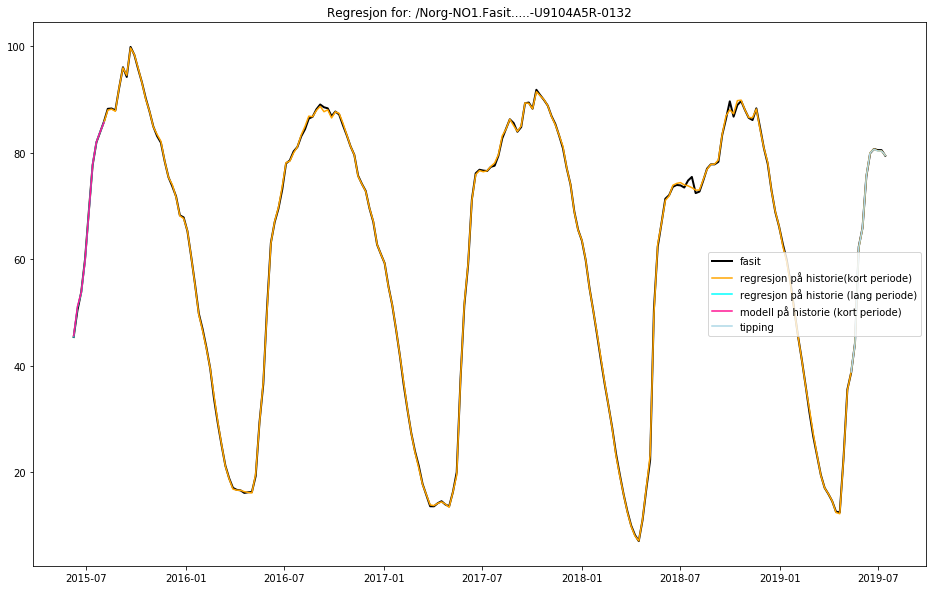

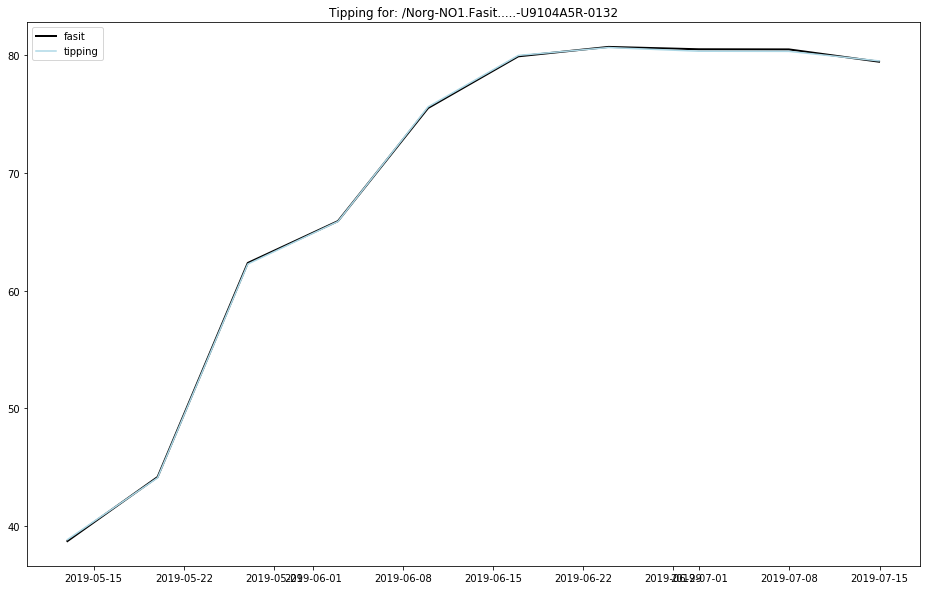

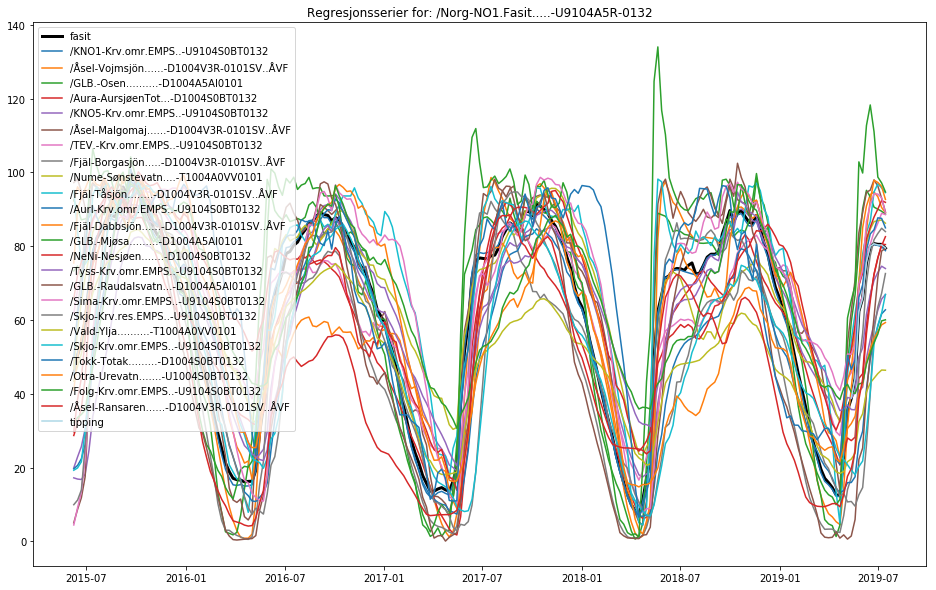


Regresjonen med tuning tok 3 minutter. 

5 5 0.9975229046090717 0.9888475622320525 0.9931852334205621 208 0.025
6 6 0.9976112861188873 0.9849107751202948 0.991261030619591 208 0.025
7 6 0.997807601388305 0.9655774117260969 0.981692506557201 208 0.025
8 6 0.997807601388305 0.9655774117260969 0.981692506557201 208 0.025
9 7 0.9986841899016834 0.9550618024238006 0.976872996162742 208 0.025
10 8 0.9994215344093975 0.9988325419116234 0.9991270381605104 208 0.025
11 8 0.9995153870804665 0.9996298418994664 0.9995726144899664 208 0.025
12 8 0.9995153870804665 0.9996298418994664 0.9995726144899664 208 0.025
13 8 0.9995153870804665 0.9996298418994664 0.9995726144899664 208 0.025
14 10 0.9995481509589191 0.9992084235115313 0.9993782872352253 208 0.025
15 10 0.9995511331836104 0.9992201358108473 0.999385634497229 208 0.025
16 8 0.9995985534518295 0.9986375461593613 0.9991180498055954 208 0.025
17 11 0.9996438284714493 0.9985284439422043 0.9990861362068268 208 0.025
18 13 0.9996742996362311 0.9986

118 24 0.9999335110800691 0.9996835020878059 0.9998085065839375 208 0.025
119 24 0.9999258804831379 0.9991824687316827 0.9995541746074104 208 0.025
120 24 0.9999301567136131 0.9993599803842401 0.9996450685489267 208 0.025
121 24 0.9999301567136131 0.9993599803842401 0.9996450685489267 208 0.025
122 24 0.9999368912750165 0.9992194839334875 0.999578187604252 208 0.025
123 23 0.9999235028302624 0.9994235973569611 0.9996735500936118 208 0.025
124 24 0.9999358188290097 0.9983680385154107 0.9991519286722101 208 0.025
125 24 0.9999358188290097 0.9983680385154107 0.9991519286722101 208 0.025
126 23 0.9999235028302624 0.9994235973569611 0.9996735500936118 208 0.025
127 23 0.9999235028302624 0.9994235973569611 0.9996735500936118 208 0.025
128 24 0.9999244457280128 0.9989619462016996 0.9994431959648562 208 0.025
129 24 0.9999210815107581 0.9995410341994762 0.9997310578551171 208 0.025
130 24 0.9999210815107581 0.9995410341994762 0.9997310578551171 208 0.025
131 24 0.9999063017054127 0.99943239758

In [ ]:
columns = ['ant_kandidater', 'ant_serier', 'r2_modelled', 'r2_tippet', 'r2_samlet', 'short_period', 'max_p']
# Initializing
max_p = 0.025
first_period = 208  # Finn hele perioden

#['magasin', 'tilsig']
for variable in ['magasin', 'tilsig']:
    df_week, MagKap, period, forecast_time, read_start = auto_input[variable]
    reg_end = (pd.to_datetime(time.strftime(forecast_time), format="%Y.%m.%d") - Timedelta(days=7)).strftime('%Y.%m.%d')
    if (0 <= today.weekday() <= 1) or (today.weekday() == 2 and today.hour < 14):  # True for tipping
        last_forecast = forecast_time
    else:
        last_forecast = reg_end
    df_cleaned = deletingNaNs(df_week.loc[:last_forecast])
    if variable == 'tilsig':
        print('---------------------------------------------------------------')
        print('                        TILSIG                                 ')
        print('---------------------------------------------------------------')
        max_kandidater = 196
        min_kandidater = 5
        print('variable = {}'.format(variable))
    elif variable == 'magasin':
        print('---------------------------------------------------------------')
        print('                        MAGASIN                                ')
        print('---------------------------------------------------------------')
        max_kandidater = 135
        min_kandidater = 5
        print('variable = {}'.format(variable))
    else:
        print("variable in line 14 must be either 'tilsig' or 'magasin'")
        sys.exit(1)
    max_weeks = 208
    min_weeks = 10
    print('max ant. kandidater: {}, min ant. kandidater: {}'.format(max_kandidater, min_kandidater))
    print('max ant. uker: {}, min ant. uker: {}'.format(max_weeks, min_weeks))

    # ['NO1', 'NO2', 'NO3', 'NO4', 'NO5', 'SE1', 'SE2', 'SE3', 'SE4']
    for region in ['NO1', 'NO2', 'NO3', 'NO4', 'NO5', 'SE1', 'SE2', 'SE3', 'SE4']:
        start_time_loop = utctime_now()
        fasit, fasit_key = make_fasit(variable, region, reg_end, period)
        sorted_r2 = get_R2_sorted(variable, df_cleaned, fasit, fasit_key)


        # Første loop: Tuner antall kandidater som gir best R2 samlet
        start_time = time.time()
        df_ant_kandidater = pd.DataFrame(columns=columns)
        for antall in range(min_kandidater, max_kandidater+1, 1):
            if antall > len(sorted_r2):
                chosen_r2 = sorted_r2
            else:
                chosen_r2 = sorted_r2[:antall]
            output = make_estimate(df_cleaned, fasit, fasit_key, last_forecast, first_period, max_p, chosen_r2, loop=True)
            df_ant_kandidater = df_ant_kandidater.append(
                {columns[0]: output[0], columns[1]: output[1], columns[2]: output[2], columns[3]: output[3],
                 columns[4]: output[4], columns[5]: output[5], columns[6]: output[6]}, ignore_index=True)
            if antall > len(sorted_r2):
                print('Feilmelding: Ønsket antall kandidater overskrider maks (%i).\n' % len(sorted_r2))
                break
        idx_max = df_ant_kandidater.r2_samlet.idxmax(skipna=True)
        ant_kandidater_beste = int(df_ant_kandidater.ant_kandidater.values[idx_max])
        print('Beste ant_kandidater loop 1: ', ant_kandidater_beste)
        end_time = time.time()
        print('Time to run loop 1: ', end_time - start_time)

        # Andre loop: tuner lengden på den korte regresjonen som gir best R2 samlet
        start_time = time.time()
        df_short_period = pd.DataFrame(columns=columns)
        for short_period in range(min_weeks, max_weeks+1, 1):
            short_period = int(short_period)
            final_chosen_r2 = sorted_r2[:ant_kandidater_beste]
            output = make_estimate(df_cleaned, fasit, fasit_key, last_forecast, short_period, max_p, final_chosen_r2, loop=True)
            df_short_period = df_short_period.append(
                {columns[0]: output[0], columns[1]: output[1], columns[2]: output[2], columns[3]: output[3],
                 columns[4]: output[4], columns[5]: output[5], columns[6]: output[6]}, ignore_index=True)
        idx_max = df_short_period.r2_samlet.idxmax(skipna=True)
        short_period_beste = int(df_short_period.short_period.values[idx_max])
        print('Beste short_period loop 2: ', short_period_beste)
        end_time = time.time()
        print('Time to run loop 2: ', end_time - start_time)

        # FINAL RESULTS AFTER TUNING
        # Update with the input which gives the best R2 samlet
        df_all_methods = pd.concat([df_ant_kandidater, df_short_period], ignore_index=True, sort=False)
        idx_max = df_all_methods.r2_samlet.idxmax(skipna=True)
        ant_kandidater_beste = int(df_all_methods.ant_kandidater.values[idx_max])
        chosen_r2_beste = sorted_r2[:ant_kandidater_beste]
        short_period_beste = df_all_methods.short_period.values[idx_max]
        write_input_variables_to_file(region, variable, max_p, ant_kandidater_beste, short_period_beste)
        # Show results
        input1 = make_estimate(df_cleaned, fasit, fasit_key, last_forecast, short_period_beste, max_p, chosen_r2_beste, loop=False)
        input2 = fasit_key, ant_kandidater_beste, max_p, reg_end, read_start
        show_result_jupyter(input1, input2)
        print('\nRegresjonen med tuning tok %.0f minutter. \n' % ((utctime_now() - start_time_loop) / 60))

print('---------------------------------------------------------------')
print('                         SLUTT                                 ')
print('---------------------------------------------------------------')
print('\nScriptet brukte totalt %.0f minutter. \n' % ((utctime_now() - start_time) / 60))